# ECSE415 - Intro to Computer Vision
## Tutorial 9 - Introduction to Machine Learning  using Scikit-Learn


A machine learning problem consists of $n$ instances of data and attempts to predict properties of unseen data. Each instance is generally an array of data which is said to be its respective features.

Learning problems can be separated into several categories:
* Supervised Learning: data comes with additional attributes that we want to predict. This problem can be either:
 * Classification: Samples belong to two or more classes and the algorithm learns from already labeled data to         predict to class of unseen data.
 * Regression: the desired output consists of one or more continuous variables.
* Unsupervised Learning: data consists of a set of input vectors without any corresponding target values. Examples include clustering, density estimation, etc.

In [35]:
from sklearn import datasets
digits = datasets.load_digits()
print("Input data sample:")
print(digits.data[0:3])
print("Input data dimensions:", digits.data.shape)
print("Output labels:")
print(digits.target[0:3])
print("Output data dimensions:", digits.target.shape)

Input data sample:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.

For this specific dataset, the task is to predict the output label (number from 0-9) for each input image. Since we are provided with examples of each of the 10 possible classes, we can now attempt to *fit* an estimator to be able to *predict* the classes to which unseen samples belong.

We can begin by looking at a Support Vector Machine.

Predicted Label: [8]
Actual Label: [8]


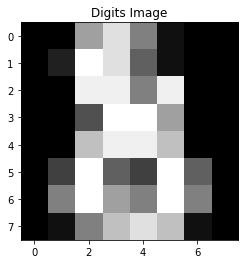

In [20]:
from sklearn import svm
import matplotlib.pyplot as plt
clf = svm.SVC(gamma=0.001, C=100.)
# training, let's us all the data but the last instance
clf.fit(digits.data[:-1], digits.target[:-1])
# now predict the label for the last instance
print("Predicted Label:", clf.predict(digits.data[-1:]))
print("Actual Label:", digits.target[-1:])
plt.figure()
plt.imshow(digits.data[-1].reshape(8,8), cmap='gray')
plt.title("Digits Image")
plt.show()

Scikit learn also lets you save your best model to disk for future uses.

In [23]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pk1')

# load back the pickled model at a later time
clf = joblib.load('filename.pk1')

You can also update and fine-tune hyper-parameters after the model has been constructed.

In [34]:
from sklearn import svm
# classifer object
clf = svm.SVC()
# set hyper-parameters
print("Linear Kernel:")
clf.set_params(kernel='linear').fit(digits.data[:-10], digits.target[:-10])
print("\tPredicted Labels:", clf.predict(digits.data[-10:]))
print("\tActual Labels:   ", digits.target[-10:])
print("")
print("Radial Basis Function Kernel:")
clf.set_params(kernel='rbf').fit(digits.data[:-10], digits.target[:-10])
print("\tPredicted Labels:", clf.predict(digits.data[-10:]))
print("\tActual Labels:   ", digits.target[-10:])

Linear Kernel:
	Predicted Labels: [5 4 8 8 4 9 0 8 9 8]
	Actual Labels:    [5 4 8 8 4 9 0 8 9 8]

Radial Basis Function Kernel:
	Predicted Labels: [5 4 5 5 4 9 5 5 5 5]
	Actual Labels:    [5 4 8 8 4 9 0 8 9 8]


Scikit learn also supports multiclass and mutlilabel fitting.

In [37]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator = SVC(random_state=0))
classif.fit(X,y).predict(X)


array([0, 0, 1, 1, 2])